In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import cProfile
from numba import njit

In [2]:
real_space = np.linspace(-1.5, 1.5, 500)
comp_space = np.linspace(-1.5, 1.5, 500)

In [3]:
# @njit
def get_period(zs):
    real_zs = []
    for i in range(len(zs)):
        real_zs.append(zs[-i-1].real)
    real_p = np.abs(real_zs[0] - np.array(real_zs)) < 1e-2
    
    imag_zs = []
    for i in range(len(zs)):
        imag_zs.append(zs[-i-1].real)
    imag_p = np.abs(imag_zs[0] - np.array(imag_zs)) < 1e-2
        
    period = []
    for i in range(1, len(zs)):
        period.append(int(real_p[i] * imag_p[i]))
    return period
    

def Mandelbrot(real_space, comp_space, n=100):
    colors = []
    for j in comp_space:
        for i in real_space:
            z = complex(0,0)
            C = complex(i,j)
            zs = []
            for k in range(n):
                z = z*z + C
                zs.append(z)
                if abs(z) > 10:
                    break
            zs = np.array(zs)
            period = np.array(get_period(zs))
            s = np.sum(period)
            if s == 0:
                color = 255
            elif s != 0:
                color = np.min(np.nonzero(period)) * 255 / n
            colors.append(color)
    return np.array(colors).reshape(real_space.shape[0], -1)

In [4]:
%%timeit
colors = Mandelbrot(real_space, comp_space)

15.8 s ± 99.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%load_ext snakeviz

In [6]:
%snakeviz Mandelbrot(real_space, comp_space)

 
*** Profile stats marshalled to file 'C:\\Users\\Liza\\AppData\\Local\\Temp\\tmpyzngg98z'. 
Embedding SnakeViz in this document...


The most expensive parts are summation and function get_period

In [7]:
colors = Mandelbrot(real_space, comp_space)

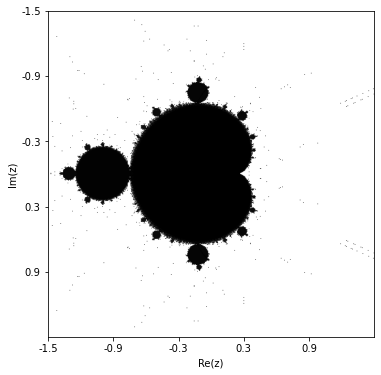

In [8]:
plt.figure(figsize=(10,6))
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.xticks(ticks = [0, 100, 200, 300, 400, 500], labels=['-1.5', '-0.9', '-0.3', '0.3', '0.9', '1.5'])
plt.yticks(ticks = [0, 100, 200, 300, 400, 500], labels=['-1.5', '-0.9', '-0.3', '0.3', '0.9', '1.5'])
plt.imshow(colors.reshape(500,-1), cmap=plt.cm.gray)

In [9]:
times = []
for n in 2**np.arange(1, 11):
    time = %timeit -q -o -n 1 -r 1 Mandelbrot(real_space, comp_space, n=n)
    times.append(time.best)

In [10]:
@njit
def get_period(zs):
    real_zs = []
    for i in range(len(zs)):
        real_zs.append(zs[-i-1].real)
    real_p = np.abs(real_zs[0] - np.array(real_zs)) < 1e-2
    
    imag_zs = []
    for i in range(len(zs)):
        imag_zs.append(zs[-i-1].real)
    imag_p = np.abs(imag_zs[0] - np.array(imag_zs)) < 1e-2
        
    period = []
    for i in range(1, len(zs)):
        period.append(int(real_p[i] * imag_p[i]))
    return period
    

def Mandelbrot(real_space, comp_space, n=100):
    colors = []
    for j in comp_space:
        for i in real_space:
            z = complex(0,0)
            C = complex(i,j)
            zs = []
            for k in range(n):
                z = z*z + C
                zs.append(z)
                if abs(z) > 10:
                    break
            zs = np.array(zs)
            period = np.array(get_period(zs))
            s = np.sum(period)
            if s == 0:
                color = 255
            elif s != 0:
                color = np.min(np.nonzero(period)) * 255 / n
            colors.append(color)
    return np.array(colors).reshape(real_space.shape[0], -1)

In [11]:
%%timeit
colors = Mandelbrot(real_space, comp_space)

3.68 s ± 352 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
colors = Mandelbrot(real_space, comp_space)

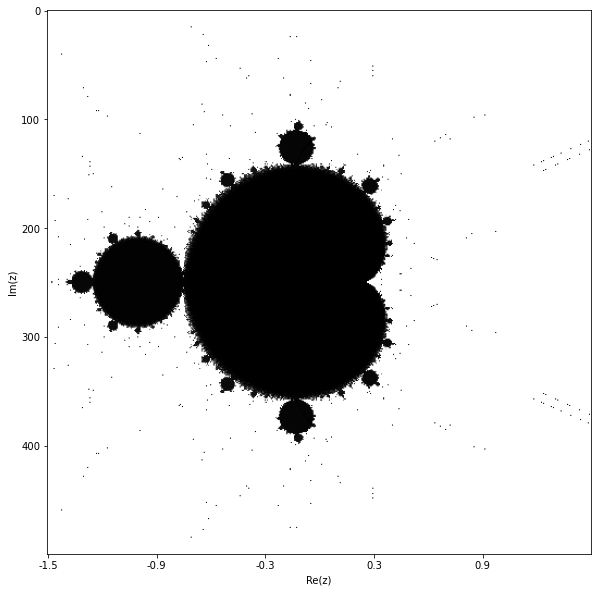

In [13]:
plt.figure(figsize=(10,10))
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.xticks(ticks = [0, 100, 200, 300, 400, 500], labels=['-1.5', '-0.9', '-0.3', '0.3', '0.9', '1.5'])
plt.imshow(colors.reshape(500,-1), cmap=plt.cm.gray)

The result seems to be the same

In [14]:
jit_times = []
for n in 2**np.arange(1, 11):
    time = %timeit -q -o -n 1 -r 1 Mandelbrot(real_space, comp_space, n=n)
    jit_times.append(time.best)

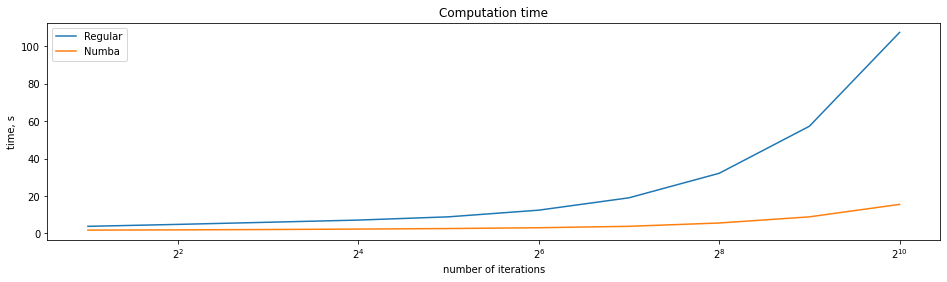

In [23]:
plt.figure(figsize=(16,4))
plt.title('Computation time')
plt.plot(2**np.arange(1,11), times, label='Regular')
plt.plot(2**np.arange(1,11), jit_times, label='Numba')
plt.xlabel('number of iterations')
plt.ylabel('time, s')
plt.xscale('log', base=2)
plt.legend()